## import Dataset 

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("C:\\Users\\ali\\Downloads\\Customer Churn.csv")


In [3]:
df.head()
df.shape
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [4]:
df.TotalCharges = df.TotalCharges.replace(' ', '0')
df.TotalCharges = df.TotalCharges.astype('float')        # change datatype object to float with the help of astype func

In [5]:
df.TotalCharges.info

<bound method Series.info of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64>

In [6]:
df.isnull().sum()  # check null value present in data or not

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()  # check the duplicate value 

np.int64(0)

In [8]:
df.customerID.duplicated().sum() # check particular column

np.int64(0)

### converted 0 and 1 values of senior citizen to yes/no to make it easier t understand

In [9]:
def conv(value):
    if value == 1:
        return "yes"

    else:
        return "no"

df.SeniorCitizen = df.SeniorCitizen.apply(conv)

In [10]:
df.head(19)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


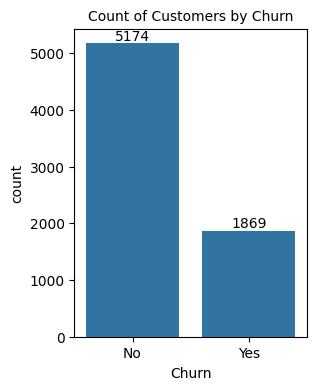

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3,4))
ax = sns.countplot(x = "Churn", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn", fontsize=10)
plt.show()

### * Show the Churn percentage with the help of pie chart

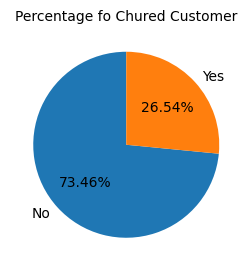

In [12]:
plt.figure(figsize=(3,4))  # minimize size of pie chart

gb = df.groupby("Churn").agg({"Churn":"count"})

plt.pie(gb.Churn, labels=gb.index, autopct="%1.2f%%", startangle=90)
plt.title("Percentage fo Chured Customer", fontsize = 10)
plt.show()


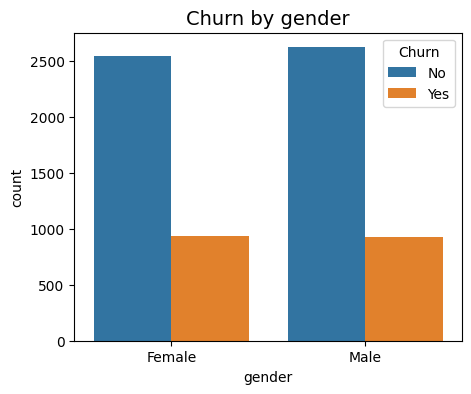

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(x = 'gender', data=df, hue='Churn')
plt.title("Churn by gender", fontsize=14)
plt.show()

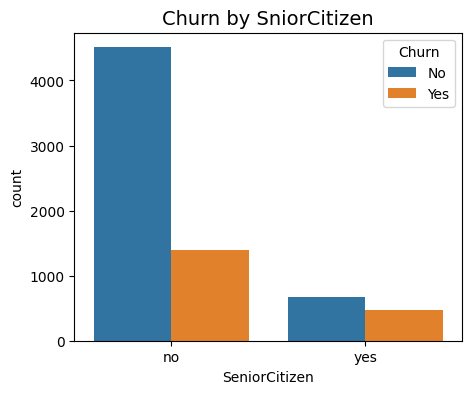

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(x = 'SeniorCitizen', data=df, hue='Churn')
plt.title("Churn by SniorCitizen", fontsize=14)
plt.show()

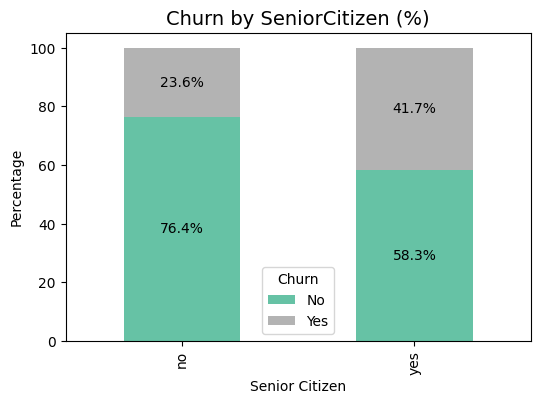

In [17]:
# Step 1: Crosstab (counts of SeniorCitizen vs Churn)
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert counts to percentages
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked bar
ax = ct_percent.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set2')

# Step 4: Add labels (% on each segment)
for i, row in enumerate(ct_percent.values):
    cum = 0
    for j, val in enumerate(row):
        if val > 0:   # only label non-empty bars
            ax.text(i, cum + val/2, f"{val:.1f}%", ha='center', va='center', fontsize=10)
        cum += val   # <-- IMPORTANT: move up for next segment

plt.title("Churn by SeniorCitizen (%)", fontsize=14)
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.legend(title="Churn")
plt.show()


### * comparative a greater percentage of people in senior citizen category have churned

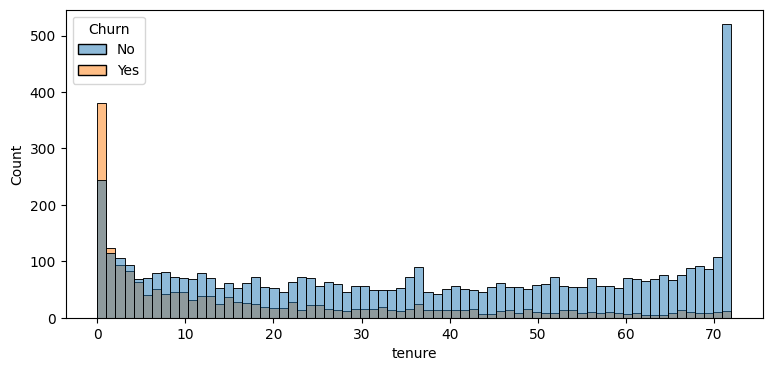

In [27]:
import seaborn as sns

plt.figure(figsize=(9,4))
sns.histplot(x="tenure", data = df, bins = 70, hue='Churn')
plt.show()

### * people who have used our services for a long time have stayed and people who have used our sevices #1 or 2 months have churned

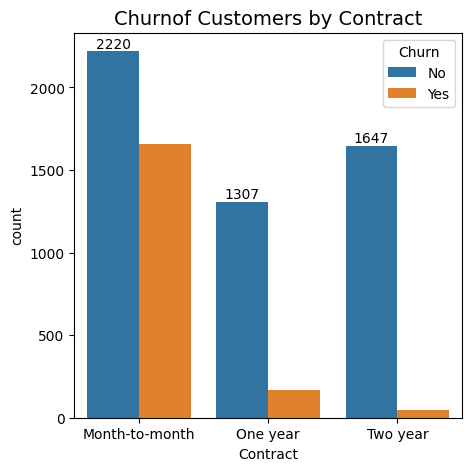

In [30]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = 'Contract', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Churnof Customers by Contract", fontsize=14)
plt.show()

In [32]:
# people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract.

In [33]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

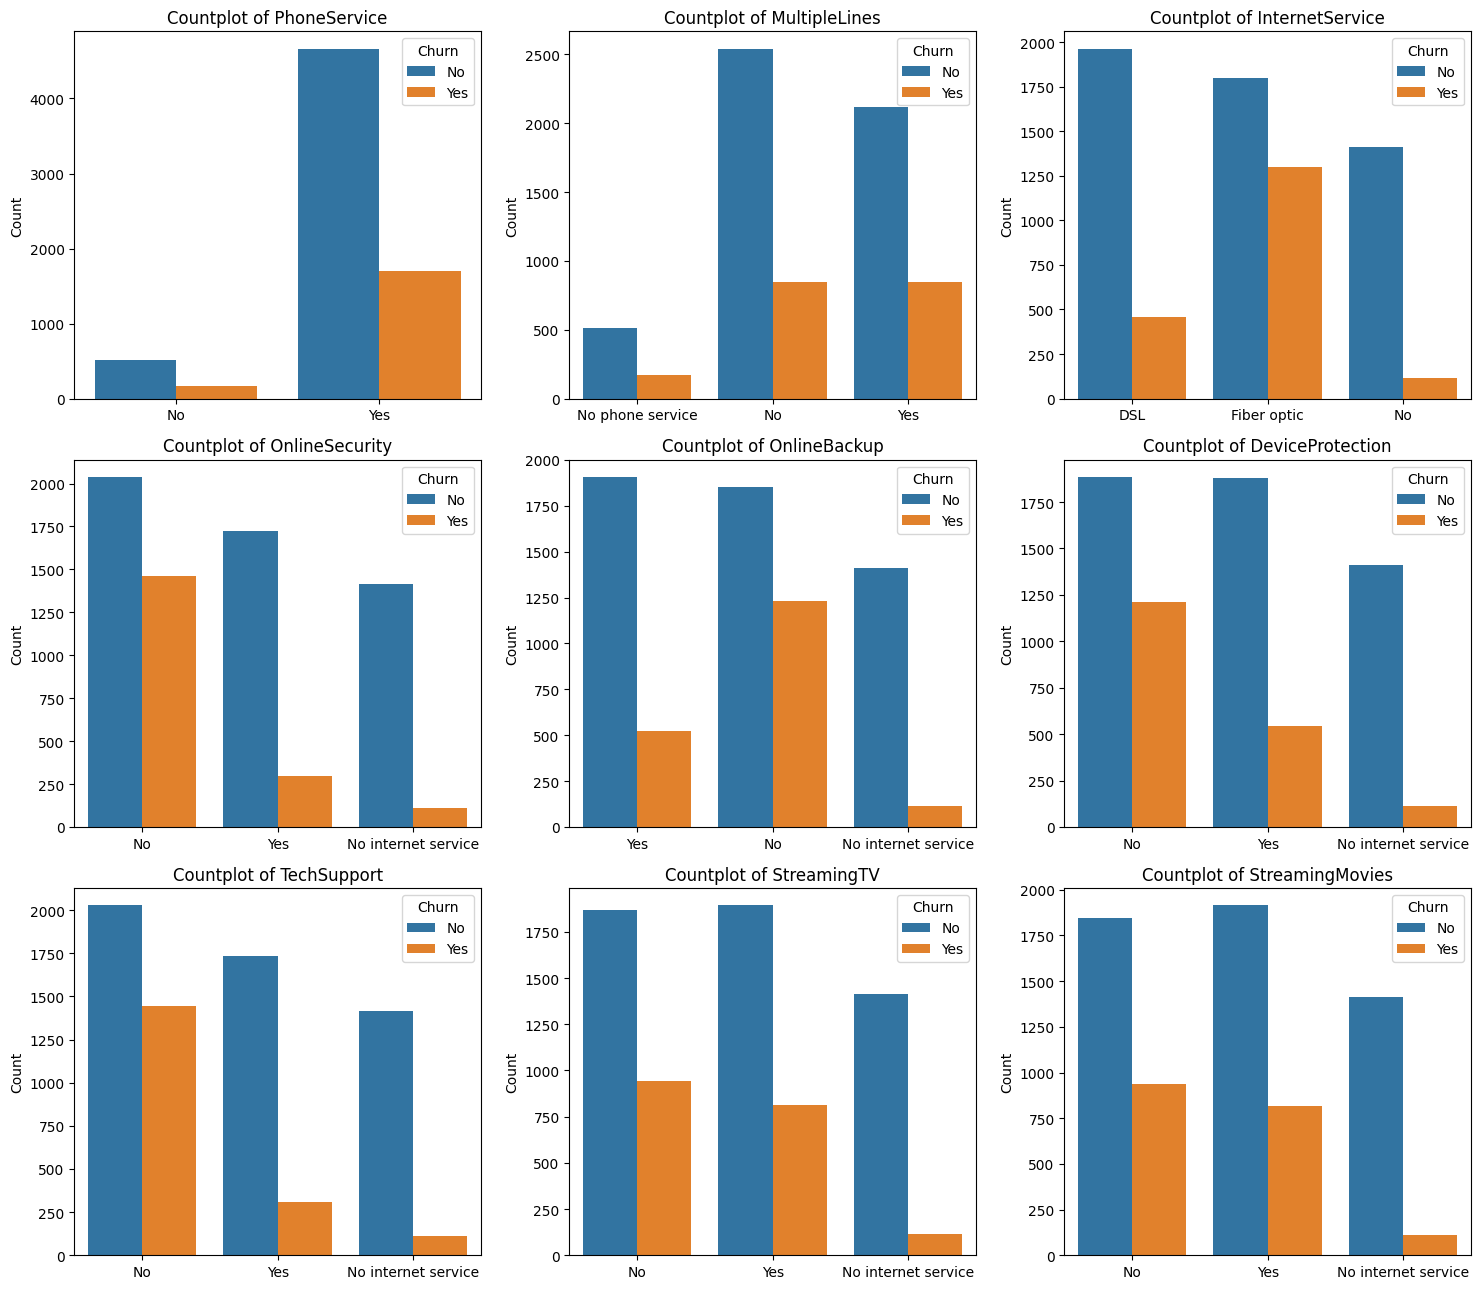

In [37]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Columns you want to plot
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of rows & columns for subplot grid
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  # auto adjust rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 13))
axes = axes.flatten()  # make axes iterable

# Loop through columns and plot
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue = "Churn")
    axes[i].set_title(f"Countplot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=0)  # rotate labels if long

# Remove empty subplots (if cols not multiple of n_cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


 ## * From the plots, it is clear that customers with no internet service show very low churn rates across features like Online Security, Backup, Device Protection, and Streaming services.
## * Fiber optic users tend to churn more compared to DSL users.
## * In general, customers without added services (like security, backup, or support) show higher churn, highlighting the importance of bundled services in retaining customers.

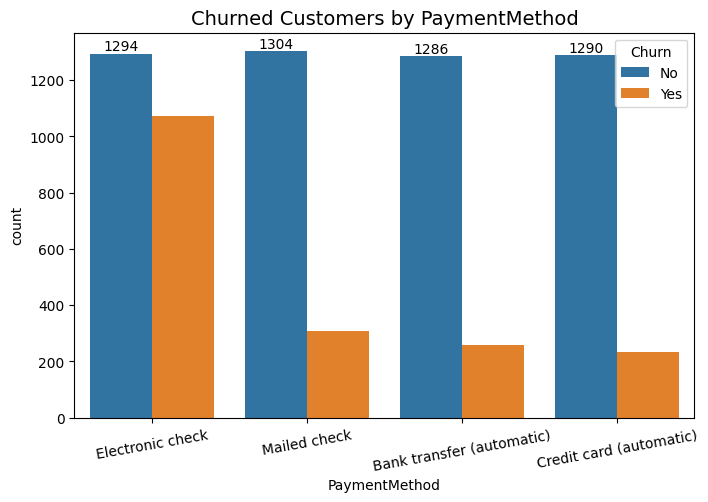

In [43]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x = 'PaymentMethod', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Churned Customers by PaymentMethod", fontsize=14)
plt.xticks(rotation = 10)
plt.show()

### * customer is likely to churn when he is using electroni check as a payment method.